

# Project: For What Reasons , Patients are not showing up for their appointments in Brazil

### Note :  noshowappointments-kagglev2-may-2016.csv was used for this analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
 What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
 Does the Scholarship have an effect on the absence of patients ?
 Does the age an effect on the absence of patients ?
 is the location of the patient affect the appointment show ?

In [3]:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np


<a id='wrangling'></a>
# Data Wrangling



### General Properties

In [4]:
# Loading data and inspect it if there is any missing data ,incorrect data types 

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# checking for duplicates
sum(df.duplicated())
#---> There is no duplicated rows and there are no missing data we only need to correct some types of columns

0



# Check for missing data types and duplicates

#### Change column names to make them more easy to use 

In [7]:
newnames =[]
for c in df.columns :
    c= c.lower()
    newnames.append(c)
df.columns = newnames
df.rename(columns ={"no-show" : "no_show" }, inplace = True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### we will covert yes and no to 1 and 0 to see the relationship between columns


In [8]:
df.no_show.unique()
new = []
for i in df.no_show :
    if i == "Yes" :
        new.append(0)
    elif i == 'No' :
        new.append(1)
dfv1 = df.copy()
# df_v1.drop("no_show" , axis = 1 , inplace = True)
dfv1.no_show = np.array(new)
dfv1.head()
dfv1.drop(['patientid','appointmentid'] , axis = 1 , inplace = True)
dfv1

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [9]:
df.scholarship.unique() ,dfv1.age.unique()
#age contains -1 wich is impossible we have todrop ros that contains -1 in age

(array([0, 1], dtype=int64),
 array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
         15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
         79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
          6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
         35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
         24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
         14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
         86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
       dtype=int64))

In [10]:
dfv1 = dfv1.query("age >= 0")

<a id='eda'></a>
# Exploratory Data Analysis

>Now we are going to answer those questions that we have asked before
###  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## Check if neighbourhood has an affect

In [11]:
dfshow = dfv1.groupby(dfv1.neighbourhood).mean()
pd.DataFrame(dfshow)

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
neighbourhood,,,,,,,,
AEROPORTO,53.125000,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.875000
ANDORINHAS,36.106101,0.142794,0.259063,0.132184,0.022989,0.040230,0.250663,0.769673
ANTÔNIO HONÓRIO,36.845018,0.051661,0.018450,0.011070,0.000000,0.003690,0.343173,0.815498
ARIOVALDO FAVALESSA,32.847518,0.184397,0.131206,0.067376,0.049645,0.039007,0.202128,0.780142
BARRO VERMELHO,45.040189,0.000000,0.134752,0.054374,0.004728,0.014184,0.338061,0.784870
...,...,...,...,...,...,...,...,...
SÃO JOSÉ,33.613556,0.091047,0.259484,0.120384,0.041477,0.039960,0.338392,0.783510
SÃO PEDRO,36.038807,0.131127,0.273693,0.101716,0.061275,0.039624,0.284314,0.789624
TABUAZEIRO,34.965517,0.171456,0.227331,0.076628,0.018199,0.027139,0.306194,0.817050


In [12]:
dfshow.no_show.describe()

count    81.000000
mean      0.794572
std       0.097230
min       0.000000
25%       0.782546
50%       0.802412
75%       0.820093
max       1.000000
Name: no_show, dtype: float64

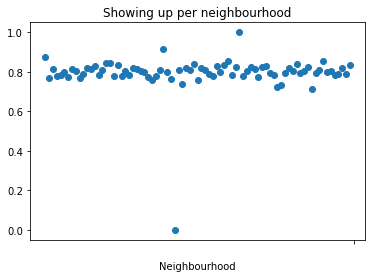

In [13]:
plt.scatter(dfshow.index , dfshow.no_show )
plt.xticks(' ')
plt.xlabel('Neighbourhood')
plt.title('Showing up per neighbourhood')
plt.show()


##### We can see that therre is a linear distribution and there is no difference between hospital locations so neighbourhood has no affect on the patient's showing up

##   

##   

##   

## Does the Scholarship have an effect on the absence of patients


In [14]:
dfsch = dfv1.groupby(dfv1.scholarship).mean()
pd.DataFrame(dfsch)

,age,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
scholarship,,,,,,,
0,37.794612,0.199839,0.073988,0.028415,0.022706,0.320845,0.801926
1,30.616242,0.173465,0.052389,0.048614,0.018046,0.322714,0.762637


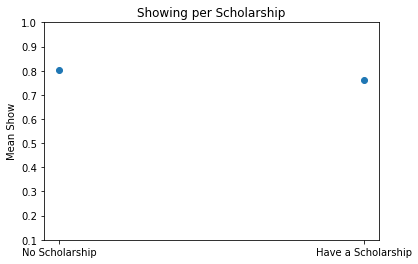

In [15]:
# dflow.scholarship.plot(kind="bar" , subplots = True , figsize =(15,5) )
dfsch.index =["No Scholarship", "Have a Scholarship"]
plt.scatter(dfsch.index , dfsch.no_show)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# plt.xlabel(['Neighbourhood with low show', 'Neighbourhood with high show'])
plt.ylabel('Mean Show')
plt.title('Showing per Scholarship')
plt.show()
# dfhigh.scholarship.plot(kind="bar" , subplots = True , figsize =(15,5) )

##### We Can Conclude that scholarship has no affect on showing

##   

##   

##    

## L'ts check if the gender has an effect 

In [16]:
dfgender =dfv1.groupby("gender").mean()

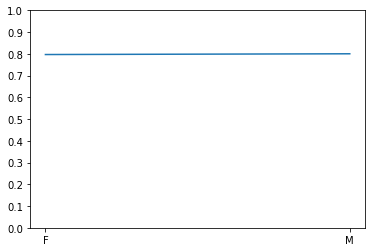

In [17]:
plt.plot(dfgender.index , dfgender.no_show)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

# plt.xticks('')
# plt.xlabel(['Neighbourhood with low show', 'Neighbourhood with high show'])

plt.ylabel('')
plt.show()

##### -----> There is no defference in gender (horizontal plot)

##   

##   

##   

## Let's Check for types of sickness if they can affect the presence

In [18]:
dfv1.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [19]:
dfdiabetes =dfv1.groupby("diabetes").mean()
dfhipertension =dfv1.groupby("hipertension").mean()
dfalcohol =dfv1.groupby("alcoholism").mean()
dfhandcap =dfv1.groupby("handcap").mean()


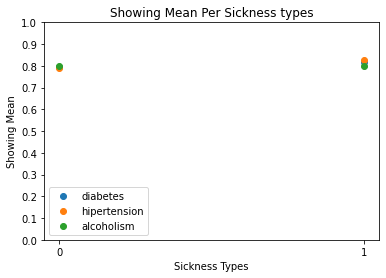

In [20]:
plt.scatter(dfdiabetes.index , dfdiabetes.no_show , label ="diabetes"  )
plt.scatter(dfhipertension.index , dfhipertension.no_show ,label ="hipertension" )
plt.scatter(dfalcohol.index , dfalcohol.no_show ,label ="alcoholism" )
plt.legend()
plt.xticks([0, 1])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel('Sickness Types')
plt.ylabel('Showing Mean')
plt.title('Showing Mean Per Sickness types')
plt.show()

#### ---> Sicknes types have no effect on showing 

##  

## 

 ##    

## Let's Check for number of Handcap if they can affect the presence

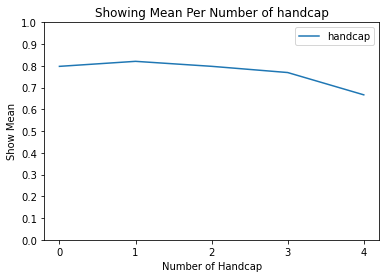

In [21]:
plt.plot(dfhandcap.index , dfhandcap.no_show ,label ="handcap")
plt.xticks([0, 1 ,2,3,4])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel('Number of Handcap')
plt.ylabel('Show Mean')
plt.title('Showing Mean Per Number of handcap')
plt.legend()
plt.show()

##### ---> We can see that people that has less probability of getting scholarship are more llikely to be absent

#  

##   

## 

## Does the age has an effect on the presence of patients?

In [22]:
dfv1.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [23]:
levels = [0,18,37,55,115]
lvlname =['young' , 'youth' ,'old' ,'Very old']
dfage = dfv1.copy()
dfage['age_category'] = pd.cut(dfv1['age'], levels, labels=lvlname)
dfagef = dfage.groupby('age_category').mean()

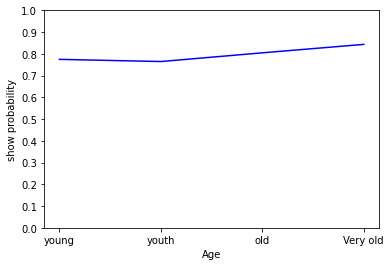

In [24]:
colors =  ["red","blue"]
plt.plot(dfagef.index ,dfagef.no_show ,color="blue")
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel("show probability")
plt.xlabel('Age')
plt.show()

##### ----------> We can see that line is slightly rising with the age we can assume that people with 35 and older are more likely to be present in the appointment


### 

### 

### 

## Does the sms has an effect on the presence of pacients 

In [25]:
dfv1.groupby('sms_received').mean()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
sms_received,,,,,,,
0,36.888465,0.098022,0.198963,0.07445,0.033487,0.024932,0.832965
1,37.513810,0.098782,0.193619,0.06640,0.023871,0.016572,0.724255


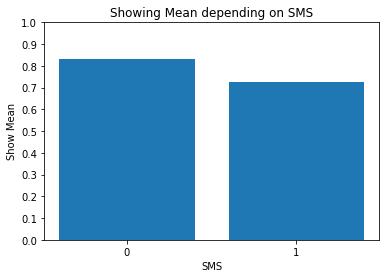

In [26]:
plt.bar(dfv1.groupby('sms_received').mean().index , dfv1.groupby('sms_received').mean().no_show )
plt.xticks([0, 1])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel('SMS')
plt.ylabel('Show Mean')
plt.title('Showing Mean depending on SMS')
plt.show()

### ---> We can clearly see that people receiving sms are more likely to be absent

#   

#   

#   

# we are going to make dates daily to get more gloal view on the dataset and inspect the duration between appointment and scheduled day and wich part of the day would have an effect on the presence of pacients


In [27]:
dfv1.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [28]:
dfv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110526 non-null  object
 1   scheduledday    110526 non-null  object
 2   appointmentday  110526 non-null  object
 3   age             110526 non-null  int64 
 4   neighbourhood   110526 non-null  object
 5   scholarship     110526 non-null  int64 
 6   hipertension    110526 non-null  int64 
 7   diabetes        110526 non-null  int64 
 8   alcoholism      110526 non-null  int64 
 9   handcap         110526 non-null  int64 
 10  sms_received    110526 non-null  int64 
 11  no_show         110526 non-null  int32 
dtypes: int32(1), int64(7), object(4)
memory usage: 10.5+ MB


In [68]:
def split(df , x = None, y= None ,sep = ' ') :
# list of columns to split
    split_columns = ['{}'.format(x),'{}'.format(y)]
    # create two separated dfs to make changes so we won't lose the main df
# and treat every one seperatly
    df1 = df.copy()
    df2 = df.copy()
# apply split function to each column of each dataframe copy
    for c in split_columns:
        df1[c] = df[c].apply(lambda x : x.split('{}'.format(sep))[0])
        df2[c] = df[c].apply(lambda x : x.split('{}'.format(sep))[1])
    return (df1 , df2)

In [73]:
dfdate = split(dfv1 ,'appointmentday', 'scheduledday' ,'T')[0]
dftime = split(dfv1 ,'appointmentday', 'scheduledday' ,'T')[1]
dftime.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,18:38:08Z,00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,16:08:27Z,00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,16:19:04Z,00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,17:29:31Z,00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,16:07:23Z,00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [74]:
dfdate.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [75]:
#lets take only the hour of the appointment because minutes won't effecct the decision of the patients
dftime = split(dftime ,'appointmentday', 'scheduledday',':')[0]
dftime = dftime.rename(columns ={"scheduledday" : "scheduledtime" , "appointmentday" : "appointmenttime"})
dftime.head()

,gender,scheduledtime,appointmenttime,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,18,00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,16,00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,16,00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,17,00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,16,00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


## Does The duration between the appointment Day and Scheduled Day affect the absence of patience ?

In [76]:
#Covert types of dates so that we canmake the diffrences and mesure the periode between appointment day and scheduled day
dfdate.scheduledday = pd.to_datetime(dfdate.scheduledday)
dfdate.appointmentday   = pd.to_datetime(dfdate.appointmentday)
dfdate.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [78]:
nbdays = [dfdate.appointmentday - dfdate.scheduledday]
days = pd.DataFrame(np.transpose(np.array(nbdays)))
dfdate["days"] = days
dfdate=dfdate.astype({"days" : str})
dfdate.days = dfdate.days.apply(lambda x : x.split(' ')[0])
# 
dfdate = dfdate.query("days != 'NaT' and days >= '0' ")
dfdate =dfdate.astype({"days" : int})
dfdate.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


##### 

In [79]:
dfdate.days.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123])

In [80]:
dfdate.days.describe()

count    110514.000000
mean         10.184375
std          15.255224
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days, dtype: float64

In [81]:
duration = [-1,0,4,15,179]
cap = ["very close" , "close","normal","long"]
dfdate["duration_level"] = pd.cut(dfdate["days"] , duration , labels = cap)
dfdate.groupby("duration_level").mean()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days
duration_level,,,,,,,,,
very close,35.007365,0.106434,0.180892,0.068518,0.039083,0.025130,0.157421,0.874452,0.000000
close,42.272991,0.082999,0.261170,0.100531,0.029353,0.025746,0.251102,0.786616,2.405881
normal,36.654173,0.108712,0.201926,0.070766,0.028586,0.021556,0.464365,0.756438,8.986833
long,36.630049,0.087677,0.168153,0.056089,0.020233,0.015966,0.473861,0.735482,32.239788


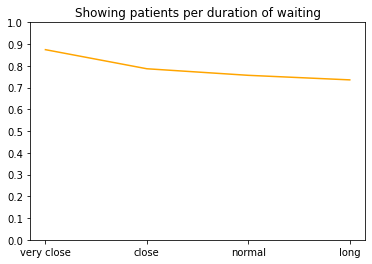

In [82]:
#plotting to see the differences
plt.plot(dfdate.groupby("duration_level").mean().index ,dfdate.groupby("duration_level").mean().no_show , color ="orange")
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title('Showing patients per duration of waiting')
plt.show()

#####  We Can Clearly see that the more the duration of the appointment is far from the scheduledday the more probability of absence of patients

##            

##            

##            

## Does the time an effect on the absence of patients ?

In [83]:
dftime.head()

,gender,scheduledtime,appointmenttime,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,18,00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,16,00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,16,00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,17,00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,16,00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [84]:
dftime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gender           110526 non-null  object
 1   scheduledtime    110526 non-null  object
 2   appointmenttime  110526 non-null  object
 3   age              110526 non-null  int64 
 4   neighbourhood    110526 non-null  object
 5   scholarship      110526 non-null  int64 
 6   hipertension     110526 non-null  int64 
 7   diabetes         110526 non-null  int64 
 8   alcoholism       110526 non-null  int64 
 9   handcap          110526 non-null  int64 
 10  sms_received     110526 non-null  int64 
 11  no_show          110526 non-null  int32 
dtypes: int32(1), int64(7), object(4)
memory usage: 10.5+ MB


In [85]:
# Convert type of time hours into int 
dftime = dftime.astype({"scheduledtime" : int})
dftime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gender           110526 non-null  object
 1   scheduledtime    110526 non-null  int32 
 2   appointmenttime  110526 non-null  object
 3   age              110526 non-null  int64 
 4   neighbourhood    110526 non-null  object
 5   scholarship      110526 non-null  int64 
 6   hipertension     110526 non-null  int64 
 7   diabetes         110526 non-null  int64 
 8   alcoholism       110526 non-null  int64 
 9   handcap          110526 non-null  int64 
 10  sms_received     110526 non-null  int64 
 11  no_show          110526 non-null  int32 
dtypes: int32(2), int64(7), object(3)
memory usage: 10.1+ MB


In [86]:
#check if there is any false values
dftime.scheduledtime.unique()

array([18, 16, 17,  8, 15, 12, 14, 11, 10,  9,  7, 13, 19, 20,  6, 21])

In [87]:
dftime.scheduledtime.describe()

count    110526.000000
mean         10.774542
std           3.216192
min           6.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: scheduledtime, dtype: float64

In [90]:
timelvl = [6,8,10,13,21]
timecap = ["early moring" , "morning" , 'mid day' ,'afternoon and night']
dftime["day_parts"] = pd.cut(dftime.scheduledtime , timelvl , labels = timecap)
dftime.head()

,gender,scheduledtime,appointmenttime,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_parts
0,F,18,00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,afternoon and night
1,M,16,00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,afternoon and night
2,F,16,00,62,MATA DA PRAIA,0,0,0,0,0,0,1,afternoon and night
3,F,17,00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,afternoon and night
4,F,16,00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,afternoon and night


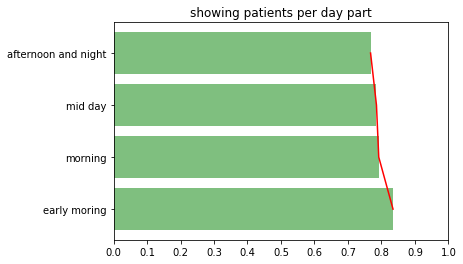

In [91]:
plt.barh(dftime.groupby("day_parts").mean().index ,dftime.groupby("day_parts").mean().no_show , color = "green" , alpha = 0.5)
plt.plot(dftime.groupby("day_parts").mean().no_show ,dftime.groupby("day_parts").mean().index , color = "red")

plt.title("showing patients per day part")
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

####  ---> We can see that the day part is slightly effecting the presence of patients , infact , patients in the early morning are likely to be present more than any other time 

##            

##            

##            

<a id='conclusions'></a>
# Conclusions

###   Results : Our data suggest that 

###### 1- The figures showed that only duration between appointment and scheduled days , age , receiving an sms and number o handicap affect the presence of patients , in fac the young people are more likely to be absent , added to that the duration has a great effect , the more olog duration is , the more likely patient is to be absent.
###### 2- Moreover , most of the appointments are in the afternoon and later , where patients tend to be absent .
###### 3- Last but not least, the probability of patient to be abscent increase by the number of handicap he has .




###   Limitations : There are a couple of limitations with our data

###### 1- It would be better if the dataset contains another column of the prices with scholarship and without
###### 2- values are very close in the analysis so that can affect our conclusion a little bit
###### 3- maybe there are some mistakes in the dataset , in fact it would be more logical if the patients that received sms will be present more than the ones who did not


<a id='conclusions'></a>
# Links i used to help me in the project

#### https://pandas.pydata.org/docs/
#### https://matplotlib.org/stable/users/index.html
#### https://numpy.org/doc/